In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# set resolution of plt figures to 120
plt.rcParams['figure.dpi'] = 150
# Helvetica doesn't support up arrow unicode
#plt.rcParams['font.family'] = 'Helvetica'

from netam.common import pick_device
from dnsmex.dxsm_performance import prep_compare_df, plot_performance_metrics
from dnsmex.local import localify

device = pick_device()
if device.type == 'mps':
    print("Actually, using CPU")
    device = "cpu"

figures_dir = localify("FIGURES_DIR")

used processes
Using CUDA GPU 0


In [2]:
data_summary = pd.read_csv(
    localify("DATA_DIR/vX_summary.csv")
)
data_summary

,nickname,pcps,samples,families
0,v1jaffe,228789,4,54354
1,v1jaffeCC,228734,4,54350
2,v1jaffe50k,57198,4,36338
3,v1tang,522580,21,43991
4,v1tangCC,651899,21,45267
5,v1tangWithN,693389,21,45622
6,v1tang50k,52259,21,25524
7,v1rodriguezPrimersWithN,347085,97,6441
8,v1rodriguez,21752,50,3071
9,v1rodriguezCC,38050,51,3592


In [3]:
compare_df = prep_compare_df(
    "../dasm-train/_ignore/model_compare.csv", 
    localify("DATA_DIR/vX_summary.csv"), 
    "output/dasm_model_parameter_count.csv")

In [ ]:
test_dataset_names = ["v1rodriguez"]
train_dataset_names = ["v1tang50k", "v1tang", "v1jaffe+v1tang", "v1jaffe+v1tangWithN"]

compare_df = compare_df[compare_df["test dataset"].str.split('_', expand=True)[0].isin(test_dataset_names)]
compare_df = compare_df[compare_df["train dataset"].isin(train_dataset_names)]

compare_df[["model", "train dataset", "test dataset", "pcps", "parameters", "overlap", "total_subacc", "csp_perplexity"]]

,model,train dataset,test dataset,pcps,parameters,overlap,total_subacc,csp_perplexity
3,dasm_13k,v1jaffe+v1tang,v1rodriguez_IGHV1,751369,13796,0.925906,0.390973,5.777606
4,dasm_13k,v1jaffe+v1tang,v1rodriguez_IGHV3,751369,13796,0.944425,0.377276,6.093092
5,dasm_13k,v1jaffe+v1tang,v1rodriguez_IGHV4,751369,13796,0.920099,0.378425,6.022095
9,dasm_1m,v1jaffe+v1tang,v1rodriguez_IGHV1,751369,1194900,0.957167,0.413598,5.414666
10,dasm_1m,v1jaffe+v1tang,v1rodriguez_IGHV3,751369,1194900,0.968858,0.398365,5.755098
11,dasm_1m,v1jaffe+v1tang,v1rodriguez_IGHV4,751369,1194900,0.960213,0.397665,5.679170
15,dasm_4m,v1jaffe+v1tang,v1rodriguez_IGHV1,751369,4749076,0.956864,0.412902,5.431825
16,dasm_4m,v1jaffe+v1tang,v1rodriguez_IGHV3,751369,4749076,0.968528,0.397481,5.774249
17,dasm_4m,v1jaffe+v1tang,v1rodriguez_IGHV4,751369,4749076,0.958739,0.397996,5.689214
21,dasm_77k,v1jaffe+v1tang,v1rodriguez_IGHV1,751369,77556,0.950478,0.403968,5.547611


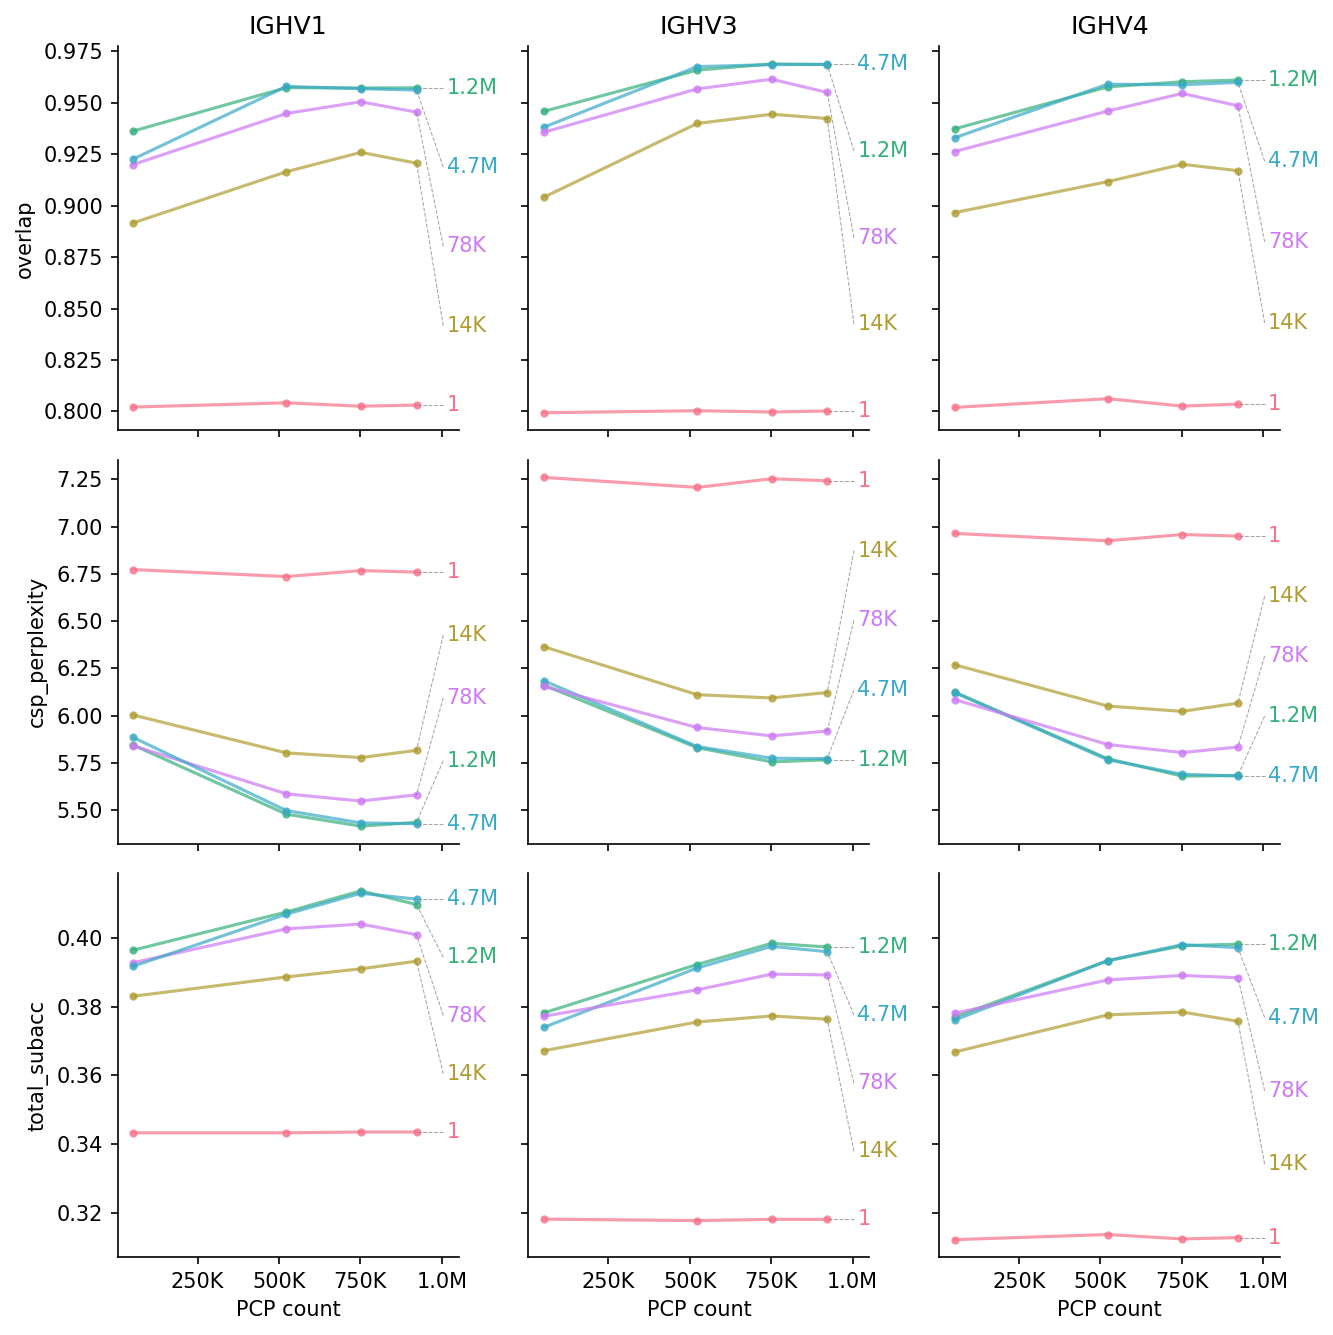

In [5]:
plot_performance_metrics(compare_df, ["overlap", "csp_perplexity", "total_subacc"], figures_dir + "dasm_performance_by_size.svg")